이것은 워드클라우드를 만들기 위한 파이썬 코드임.
작성일: 24.10.02

코드 참고: https://coding-yesung.tistory.com/201 [코딩하는 춘식이:티스토리]

In [84]:
pip install konlpy wordcloud matplotlib numpy

In [85]:
import numpy as np
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
text = open('/content/drive/MyDrive/My Journals/1_publish/0024_3_co_students MT/주관식/answer5.txt').read()
text

'나라마다 다른 관용어나 농담을 이해할 수 있도록 재치있게 표현해내는 능력\n주관식1번과 비슷하게 전달력, 호소력, 효과적인 컨텍스트 속 커뮤니케이션의 원활함 정도.\n사람의 감정을 대변\n통역에 중점을 두어야 할 것으로 보임. 번역의 경우, 번역기의 정확도가 점점 높아지고 있으며 인간이 한 번역 내용과 큰 차이 없이 느껴질 때도 있음. 하지만 통역의 경우, 공개적인 자리나 격식있는 자리에서 보여주기식으로 쓰일 뿐만 아니라 단순 텍스트 번역이 아니라 구체적인 맥락(문맥 뿐만 아니라 문화적, 사회적 맥락)을 읽고 효과적으로 뜻을 더  전달할 수 있음.\n인공지능이 인간보다 싸고 편리하다면 고용하지 않을 이유가 없다. 다만, 인간이 인공지능을 인간보다 신뢰할 수 있을지는 .\n텍스트만 번역하는 것이 아니라 인간 간에 반성과 성찰, 생각 나눔이 필요한 부분에서는 인간 통역을 쓰는 것이 더 좋을 것 같다.\n문맥에 맞게 말을 번역해내는 것.\n문학 번역 (소설/시)\n인간의 감성을  담을 수 있다.\n텍스트 간 맥락을 이해해야 하는 영역\n영화 자막 분야, 문학 번역\n.\n동시통역\n정서적 교감\n더 친절하고, 그 느낌을 살리는 것. 그렇다: 시, 문학 등 기계번역기는 더 와닿지 않을 것 같다.\n위에 썼던 것과 같은 이유로 문학 번역은 우위를 유지할 것 같다.\n초월번역이라 불리는 맥락과 문화를 고려한 번역, 또는 감정적 공감이 필요한 상황 등.\n인간 고유의 특성 파악(억양, 비언어적 제스쳐 등)\n인간의 감정이나 맥락을 파악하여 번역하는 점\n \n인간만이 가지고 있는 감정을 넣어 번역 가능\n원서 번역: 감정이나 이야기의 흐름을 파악하면서 번역하는 것은 인공지능이 따라잡기 어려워 보임\n위에서 말했듯 동시통역, 그리고 인간이 작업한 모든 작업물은 인간이 번역하는 것이 훨씬 자연스럽다고 생각한다. 영화 자막이 단순 기계를 이용한 작업이 된다면 누구도 그 영화를 완전히는 이해할 수 없을 것이다\n은유적 표현 해석\n문학작품, 시대적 배경에 따른 언어표현\n기계번

In [109]:
answer5 = text.replace("\n", "")

In [110]:
answer5

'나라마다 다른 관용어나 농담을 이해할 수 있도록 재치있게 표현해내는 능력주관식1번과 비슷하게 전달력, 호소력, 효과적인 컨텍스트 속 커뮤니케이션의 원활함 정도.사람의 감정을 대변통역에 중점을 두어야 할 것으로 보임. 번역의 경우, 번역기의 정확도가 점점 높아지고 있으며 인간이 한 번역 내용과 큰 차이 없이 느껴질 때도 있음. 하지만 통역의 경우, 공개적인 자리나 격식있는 자리에서 보여주기식으로 쓰일 뿐만 아니라 단순 텍스트 번역이 아니라 구체적인 맥락(문맥 뿐만 아니라 문화적, 사회적 맥락)을 읽고 효과적으로 뜻을 더  전달할 수 있음.인공지능이 인간보다 싸고 편리하다면 고용하지 않을 이유가 없다. 다만, 인간이 인공지능을 인간보다 신뢰할 수 있을지는 .텍스트만 번역하는 것이 아니라 인간 간에 반성과 성찰, 생각 나눔이 필요한 부분에서는 인간 통역을 쓰는 것이 더 좋을 것 같다.문맥에 맞게 말을 번역해내는 것.문학 번역 (소설/시)인간의 감성을  담을 수 있다.텍스트 간 맥락을 이해해야 하는 영역영화 자막 분야, 문학 번역.동시통역정서적 교감더 친절하고, 그 느낌을 살리는 것. 그렇다: 시, 문학 등 기계번역기는 더 와닿지 않을 것 같다.위에 썼던 것과 같은 이유로 문학 번역은 우위를 유지할 것 같다.초월번역이라 불리는 맥락과 문화를 고려한 번역, 또는 감정적 공감이 필요한 상황 등.인간 고유의 특성 파악(억양, 비언어적 제스쳐 등)인간의 감정이나 맥락을 파악하여 번역하는 점 인간만이 가지고 있는 감정을 넣어 번역 가능원서 번역: 감정이나 이야기의 흐름을 파악하면서 번역하는 것은 인공지능이 따라잡기 어려워 보임위에서 말했듯 동시통역, 그리고 인간이 작업한 모든 작업물은 인간이 번역하는 것이 훨씬 자연스럽다고 생각한다. 영화 자막이 단순 기계를 이용한 작업이 된다면 누구도 그 영화를 완전히는 이해할 수 없을 것이다은유적 표현 해석문학작품, 시대적 배경에 따른 언어표현기계번역이 번역할 수 없는 구어체 등을 번역하는 일불완전한 번역이야말로 통번역사가 인공지능에 비

In [111]:
# 형태소 분석기 초기화
okt = Okt()

In [112]:
# 형태소 분석 및 명사 추출
nouns = okt.nouns(answer5)

In [42]:
nouns

['문장',
 '경우',
 '모든',
 '문장',
 '못',
 '거나',
 '맥락',
 '파악',
 '표현',
 '표현',
 '줄',
 '말',
 '미숙',
 '문맥',
 '사람',
 '듯함',
 '비유법',
 '부분',
 '상지',
 '활용',
 '부분',
 '이',
 '정확성',
 '문단',
 '정확도',
 '언어',
 '고유',
 '표현',
 '시대',
 '사용',
 '표현',
 '이',
 '모든',
 '대체',
 '미래',
 '우려',
 '부분',
 '발전',
 '기',
 '어투',
 '이',
 '문맥',
 '파악',
 '경우',
 '약간',
 '문맥',
 '때',
 '화용론',
 '부분',
 '해석',
 '데',
 '문제',
 '움',
 '부족',
 '어투',
 '움',
 '전문성',
 '요구',
 '용어',
 '부',
 '대명사',
 '존칭',
 '부',
 '가끔',
 '답변',
 '오류',
 '때',
 '고유',
 '언어',
 '이',
 '제대로',
 '안',
 '정확성',
 '변화',
 '언어',
 '트렌드',
 '바로',
 '반영',
 '남아',
 '가끔',
 '맥락',
 '상황',
 '맥락',
 '고려',
 '일대일',
 '대응',
 '가끔',
 '문장',
 '맥락',
 '단어',
 '여러가지',
 '뜻',
 '고려',
 '해석',
 '억양',
 '맥락',
 '파악',
 '수',
 '발생',
 '부',
 '과',
 '언어',
 '문화',
 '차이',
 '발생',
 '뉘앙스',
 '전달',
 '오류',
 '기인',
 '소통',
 '오류',
 '부정',
 '확',
 '디테일',
 '부족',
 '오',
 '일상',
 '대화',
 '괴리',
 '구어',
 '체',
 '활성화',
 '부족',
 '유',
 '자유',
 '자재',
 '사용',
 '수',
 '단어',
 '뜻',
 '단어',
 '일',
 '때',
 '잘못',
 '사용',
 '수',
 '사람',
 '존속',
 '구어',
 '표현',
 '축약',
 '표현',
 '능력',
 '다소',
 '부족함'

In [121]:
# 제외
filtered_nouns = [word for word in nouns if word not in ['잘', '통', '통번역', '통역', '통역사', '통번역사', '텍스트', '분야', '영역','표현', '번역', '기계번역', '기계', '생각', '것', '않음', '곧', '때', '은', '이', '경우', '등', '수', '점', '체', '그', '데', '함', '시', '못함', '못', '오', '고', '역', '치', '와', '과', '기', '더', '즉', '안', '부', '움', '알', '확', '단어', '언어']]

In [122]:
# 명사의 빈도 계산
noun_counts = Counter(filtered_nouns)

# 빈도순으로 정렬
sorted_nouns = sorted(noun_counts.items(), key=lambda x: x[1], reverse=True)

# 상위 300개의 명사만 추출
top_300_nouns = sorted_nouns[:300]

# 상위 300개의 명사를 출력
print("상위 300개의 명사와 빈도:")
for word, count in top_300_nouns:
    print(f"{word}: {count}")

# 상위 300개의 명사를 텍스트로 변환
filtered_text = ' '.join([word for word, count in top_300_nouns])

상위 300개의 명사와 빈도:
인간: 45
감정: 35
문학: 29
전달: 27
사람: 24
맥락: 22
해석: 21
말: 18
파악: 18
문화: 16
우위: 16
인공: 15
지능: 15
상황: 15
이해: 13
의미: 13
능력: 11
의역: 11
대화: 11
사가: 10
일: 10
뉘앙스: 10
문학작품: 9
역할: 9
문맥: 8
고려: 8
비언: 8
번: 7
차이: 7
부분: 7
영화: 7
문장: 7
대한: 7
정서: 6
위: 6
유지: 6
술: 6
감성: 5
가지: 5
배경: 5
유머: 5
활용: 5
사용: 5
말투: 5
분위기: 5
재치: 4
뜻: 4
느낌: 4
고유: 4
작업: 4
요구: 4
철학: 4
글: 4
의사소통: 4
요소: 4
때문: 4
교정: 4
지식: 4
오류: 4
반영: 4
이기: 4
작품: 4
검증: 4
의: 4
발전: 4
나라: 3
관용: 3
농담: 3
정도: 3
번역기: 3
정확도: 3
자리: 3
단순: 3
사회: 3
신뢰: 3
간: 3
자막: 3
초월: 3
억양: 3
흐름: 3
동시: 3
은유: 3
시대: 3
직역: 3
한계: 3
분석: 3
국가: 3
비유: 3
검토: 3
대면: 3
전문: 3
듯: 3
창작: 3
사람과: 3
자체: 3
심리: 3
현재: 3
표면: 3
변화: 3
센스: 3
의도: 3
측면: 3
다른: 2
효과: 2
속: 2
보임: 2
내용: 2
격식: 2
뿐: 2
이유: 2
특성: 2
가능: 2
이야기: 2
이용: 2
누구: 2
유희: 2
독자: 2
인문학: 2
원문: 2
대해: 2
양: 2
정확성: 2
문제: 2
통한: 2
시간: 2
차지: 2
영어: 2
속도: 2
위트: 2
교역: 2
사: 2
채: 2
발화: 2
직접: 2
서로: 2
창의: 2
답변: 2
다단: 2
사의: 2
효율: 2
데이터: 2
속뜻: 2
절대: 2
통해: 2
소통: 2
일상: 2
관련: 2
각: 2
구사: 2
구별: 2
따라서: 2
외교: 2
및: 2
라면: 2
구성: 2
창의성: 2
어감: 2
도착: 2
과정: 2
인터뷰: 2
수정

In [123]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/content/drive/MyDrive/My Journals/1_publish/0024_3_co_students MT/주관식/HANDotum.ttf',  # 한글 폰트 경로 지정
    background_color='white',
    colormap='gray',
    max_words=300,
    width=800,
    height=400
).generate(filtered_text)

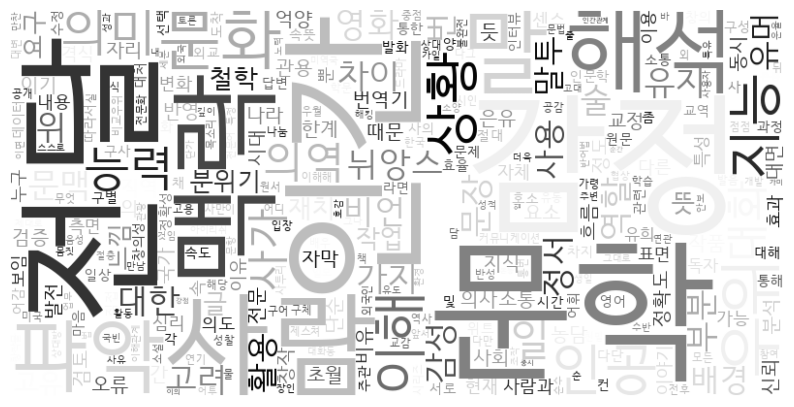

In [124]:
# 워드클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()